<a href="https://colab.research.google.com/github/dgromann/cl_intro_ws2024/blob/main/tutorials/Tutorial3_model_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Introduction to Computational Linguistics

This is the third tutorial with practical exercises for the lecture Introduction to Computational Linguistics in the winter semester 2024. Hands-on exercises are marked with 👋 ⚒ and questions are marked with ❓. Remember to first **store this notebook** in your Drive or GitHub.

---

## **Lesson 1: PyTorch Basics**

In order to get started with deep learning and practically code up neural networks, we need to familiarize ourselves with the packages that can be used to this end. There are two basic open source machine learning frameworks that can be used to this end:

*   TensorFlow (Google)
*   Torch (Facebook, Google DeepMind, Twitter)

Since these are high level core libraries, it is easier to use a framework that builds on top of it and adds some usability and documentation. We are going to for once not use the Google solution, but will go with the Facebook solution of Pytorch. This first part of today's tutorial will introduce you to some core concepts of Pytorch before we start working with embeddings.

In [2]:
# Let's first install pytorch
!pip install torch torchvision

The most basic and important concept in Pytorch is that of a **Tensor**, To speed up computation and offer more flexibility, pytorch replaces numpy arrays with tensors.

In [3]:
import torch
import numpy

# Seed for random number generator to ensure reproducibility of
# random initializations
torch.manual_seed(1)

#Difference between tensor and numpy array
a = torch.ones(5)
print("Tensor: ")
print(a)
print("Numpy array: ")
print(a.numpy(), "\n")


# This creates a randomly initialized 5 x 3 matrix
rand = torch.rand(5,3)
print("Randomly initialized tensor: ")
print(rand)
print("The shape of the matrix is its dimensions (here 5x3): ", rand.shape, "\n")

# This creates a 5 x 3 matrix filled with zeros and of dtype long
# There are eight datatypes in tensor, this one is a datatype of 64-bit integer (signed)
# Here are the others: https://pytorch.org/docs/stable/tensors.html
zeros = torch.zeros(4,3, dtype=torch.long)
print("Tensor initialized with zeros: ", zeros, "\n")

# Directly initialize a tensor with data
data = torch.tensor([[5.5, 3], [1, 2]])
print("Tensor initilialized with data: ", data, "\n")

# You can redefine an existing tensor
redefined = rand.new_ones(5, 3, dtype=torch.double)
print("Redefined randomly initialized tensor: ")
print(redefined)

redefined_too = torch.rand_like(redefined, dtype=torch.float)
print("\nInitializing randomly based on the size of redefined: ")
print(redefined_too)


# Get the size - this is actually a tuple that supports tuple operations
print(redefined_too.size())
#or
print(redefined.shape)

Tensor: 
tensor([1., 1., 1., 1., 1.])
Numpy array: 
[1. 1. 1. 1. 1.] 

Randomly initialized tensor: 
tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635]])
The shape of the matrix is its dimensions (here 5x3):  torch.Size([5, 3]) 

Tensor initialized with zeros:  tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 

Tensor initilialized with data:  tensor([[5.5000, 3.0000],
        [1.0000, 2.0000]]) 

Redefined randomly initialized tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

Initializing randomly based on the size of redefined: 
tensor([[0.4550, 0.5725, 0.4980],
        [0.9371, 0.6556, 0.3138],
        [0.1980, 0.4162, 0.2843],
        [0.3398, 0.5239, 0.7981],
        [0.7718, 0.0112, 0.8100]])
torch.Size([5, 3])
torch.Size([5, 3])


Tensors in torch also support basic operations:

In [ ]:
# Addition of tensors matching in size
x = torch.rand(5, 3)
y= torch.rand(5, 3)
print(x)
print(y)
print("Addition: ", x + y, "\n")
print("Addition alternative syntax: ", torch.add(x, y), "\n")

# Addition with providing a tensor as argument stores the result in "result"
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print("Addition with tensor as argument: ", result, "\n")

tensor([[0.1768, 0.8248, 0.8036],
        [0.9434, 0.2197, 0.4177],
        [0.4903, 0.5730, 0.1205],
        [0.1452, 0.7720, 0.3828],
        [0.7442, 0.5285, 0.6642]])
tensor([[0.6099, 0.6818, 0.7479],
        [0.0369, 0.7517, 0.1484],
        [0.1227, 0.5304, 0.4148],
        [0.7937, 0.2104, 0.0555],
        [0.8639, 0.4259, 0.7812]])
Addition:  tensor([[0.7867, 1.5066, 1.5514],
        [0.9804, 0.9714, 0.5661],
        [0.6131, 1.1034, 0.5353],
        [0.9389, 0.9824, 0.4383],
        [1.6081, 0.9544, 1.4454]]) 

Addition alternative syntax:  tensor([[0.7867, 1.5066, 1.5514],
        [0.9804, 0.9714, 0.5661],
        [0.6131, 1.1034, 0.5353],
        [0.9389, 0.9824, 0.4383],
        [1.6081, 0.9544, 1.4454]]) 

Addition with tensor as argument:  tensor([[0.7867, 1.5066, 1.5514],
        [0.9804, 0.9714, 0.5661],
        [0.6131, 1.1034, 0.5353],
        [0.9389, 0.9824, 0.4383],
        [1.6081, 0.9544, 1.4454]]) 



Indexing operations of tensors follow the numpy standard:

In [ ]:
# Indexing
print("X: ", x, "\n")
print("Element at index one of each row of the matrix ", x[1, :], "\n")

X:  tensor([[0.1768, 0.8248, 0.8036],
        [0.9434, 0.2197, 0.4177],
        [0.4903, 0.5730, 0.1205],
        [0.1452, 0.7720, 0.3828],
        [0.7442, 0.5285, 0.6642]]) 

Element at index one of each row of the matrix  tensor([0.9434, 0.2197, 0.4177]) 



Resizing: if you wish to change the shape of the tensor you can use torch.view:

In [4]:
# Resizing: what effect do the following
# resize operations have on the tensors
# Randn = normal distribution; Rand = uniform distribution of randomly created tensor
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print("Resizing: ")
print("Original")
print(x)
print("Resized view(16)", y, "\n")
print("Resized view(-1, 8)", z, "\n")

Resizing: 
Original
tensor([[-0.3206, -0.2993,  1.8793, -0.0721],
        [ 0.1578, -0.7735,  0.1991,  0.0457],
        [-1.3924,  2.6891, -0.1110,  0.2927],
        [-0.1578, -0.0288,  2.3571, -1.0373]])
Resized view(16) tensor([-0.3206, -0.2993,  1.8793, -0.0721,  0.1578, -0.7735,  0.1991,  0.0457,
        -1.3924,  2.6891, -0.1110,  0.2927, -0.1578, -0.0288,  2.3571, -1.0373]) 

Resized view(-1, 8) tensor([[-0.3206, -0.2993,  1.8793, -0.0721,  0.1578, -0.7735,  0.1991,  0.0457],
        [-1.3924,  2.6891, -0.1110,  0.2927, -0.1578, -0.0288,  2.3571, -1.0373]]) 




One of the reasons why we use **tensors** is *vectorized operations*: operations that be conducted in parallel over a particular dimension of a tensor.

In [5]:
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print("Data is:", data)

# We can perform operations like *sum* over each row...
print("Taking the sum over rows:")
print(data.sum(dim=1)) #(5,)

# or over each column.
print("Taking the sum over columns:")
print(data.sum(dim=0)) #(7,)

# Other operations are available:
print("Taking the standard deviation over rows:")
print(data.std(dim=1))

Data is: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
Taking the sum over rows:
tensor([ 28.,  77., 126., 175., 224.])
Taking the sum over columns:
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
Taking the standard deviation over rows:
tensor([2.1602, 2.1602, 2.1602, 2.1602, 2.1602])


👋 ⚒ Write code that creates a `torch.tensor` with the following contents:
$\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$

Now compute the average of each row (`.mean()`) and each column.

What's the shape of the results?

In [8]:
# Your code here
my_first_tensor = torch.tensor([[1, 2.2, 9.6], [4, -7.2, 6.3]])
print(my_first_tensor)
print(my_first_tensor.size())
print(my_first_tensor.shape)

tensor([[ 1.0000,  2.2000,  9.6000],
        [ 4.0000, -7.2000,  6.3000]])
torch.Size([2, 3])
torch.Size([2, 3])


---

## **Lesson 2: Gradients and Backpropagation**

If you set the flag  ```.requires_grad``` on a ```torch.Tensor``` to ```True``` the program will track all operations on it in order to enable later operations, such as backpropagation, which is very important to neural networks.

When you finish all computations on your tensor, you can then simply call the function ```.backward()``` and have all the gradients computed automatically.. The gradient will then automatically be accumulated in the attribute ```.grad```.

If you wish to disconnect a specific tensor from this process of tracking all operations, you can call the function ```.detach()```. This prevents future computations from being tracked. You can alternatively wrap the code block in a function ```with torch.no_grad()``` which does not track the operations on any variables included in the block. This is particularly helpful if you wish to evaluate a model that has trainable parameters with *required_grad=True* flags but for which we don't need the gradients in evaluation.

There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a `.grad_fn` attribute that references a Function that has created the `Tensor` (except for Tensors created by the user - their grad_fn is None).

If you want to compute the derivatives, you can call `.backward() `on a `Tensor`. If `Tensor` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `gradient` argument that is a tensor of matching shape.

In [9]:
# Tensor that requires gradien = operations are being tracked
x = torch.ones(2, 2, requires_grad=True)
print(x)

# Let's do some operation
y = x + 2
print(y)

# y was created that has a grad_fn
print(y.grad_fn)

# Some more operations
z = y * y * 3
out = z.mean()

print(z, out)

# Gradients
# Let's calculate and print the gradietn (d(out)/dx) and print it
out.backward()
print("Gradient of y: ")
print(x.grad)

# Stop autograd from tracking
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
Gradient of y: 
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
True
True
False


---

## **Lesson 3: Word Embeddings**

A vector representation of words trained with a neural network is called a word embedding. One of the most popular methods for training embeddings is called word2vec, which is a method for training embeddings from large natural language corpora.


`word2vec` literature:
  - Mikolov, T.,  Chen, K., Corrado, G., & Dean, J. (2013). [Efficient estimation of word representations in vector space](https://arxiv.org/abs/1301.3781). Corr abs/1301.3781.
  - Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013). [Distributed representations of words and phrases and their compositionally](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). *Advances in neural information processing systems*. 2013.


- Other variants of embeddings training:
  - `fasttext` from Facebook
  - `GloVe` from Stanford NLP Group
- There are many ways to train word embeddings:
  - `gensim`: Simplest and straightforward implementation of `word2vec` and `GloVe`
  - Training based on deep learning packages (e.g., `keras`, `tensorflow`)
  - `spacy` (It comes with a pre-trained embeddings models, using GloVe.)

When multiplying a matrix on the hidden layer with the one-hot encoding, we obtain one row of the matrix. So the matrix serves as a lookup table for embeddings.

### Using Pre-Trained Embeddings

The code below exemplifies how to load a trained embedding model in the gensim library.

In [ ]:
# Let's first load a small subset of word2vec embeddings that have been trained on a
# large corpus of news documents
!wget https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
!pip install gensim

--2024-11-12 18:36:11--  https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin [following]
--2024-11-12 18:36:11--  https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96769269 (92M) [application/octet-stream]
Saving to: ‘word2vec_embeddings.bin’

word2vec_embeddings 100%[===================>]  92.29M   216MB/s    in 0.4s    

2024-11-12 18:36:12 (216 MB/s) - ‘word2vec_embeddings.bin’ saved

In [ ]:
import gensim
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Let's load the model
model = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin", binary=True)

In [ ]:
# Print the length fo the whole vocabulary
print("Length of the vocabulary",len(model.key_to_index))

# Print the embedding of a specific word
print("Embedding for the word good: ", model["good"])

Length of the vocabulary 80000
Embedding for the word good:  [ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.1542


👋 ⚒ How many dimensions (numbers) does each vector in this trained embedding model have? Try to find this out with code, not by counting.

In [ ]:
#Your code goes here
print(len(model["France"]))

300


Let's use embeddings to evaluate how similar two words are.

👋 ⚒ How can we get the first most similiar word of good from the list of the top 5 most similar words?

In [ ]:
print(model.most_similar('good'))

# Get the top 5 most similar words of "good"
most_similar = model.most_similar("good", topn=5)
print(most_similar)

# Your code to get the first word from that list of top 5
print(most_similar[0][0])
# Get the word only from the tuple of word + cosine similarity = index of list of tuples + index of tuple


[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728850364685), ('solid', 0.5806034803390503), ('lousy', 0.576420247554779)]
[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416)]
great


We can also use these embeddings to obtain similar words in other pairs with the analogy task a is to b as c is to d, e.g. *man is to woman as king is to ?*

In [ ]:
# Check whether our embeddings are good at the analogy task
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


👋 ⚒ How can we get the first most similiar word of good from the list of the top 5 most similar words?

In [ ]:
def analogy(a, b, c):
  #Your code goes here
  result = model.most_similar(positive=[b, c], negative=[a], topn=5)
  return result


print(analogy("France", "Paris", "Austria"))
print(analogy("good", "best", "bad"))

[('Vienna', 0.6844982504844666), ('Budapest', 0.662009596824646), ('Austrian', 0.6413130164146423), ('Salzburg', 0.5972616076469421), ('Munich', 0.5895956158638)]
[('worst', 0.6776129007339478), ('dumbest', 0.5281159281730652), ('ugliest', 0.513863205909729), ('nastiest', 0.5112239122390747), ('Worst', 0.5043702721595764)]


We can use matplotlib to visualize the proximity of words in vector space.

In [ ]:
def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

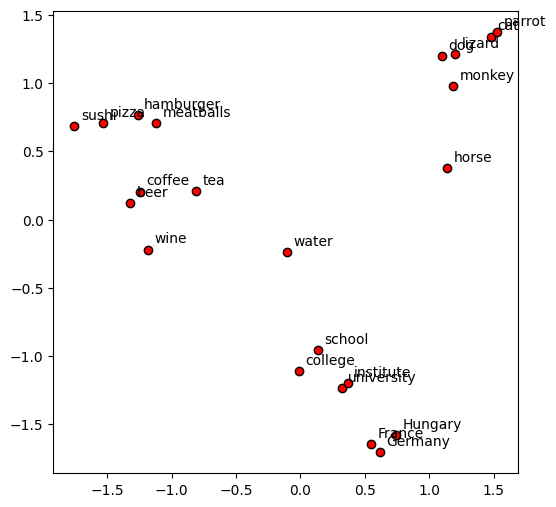

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'water',
                         'hamburger', 'pizza',  'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'lizard',
                         'France', 'Germany', 'Hungary',
                         'school', 'college', 'university', 'institute'])

---

## **Lesson 4: Language Model and Embeddings in PyTorch**


Instead of using predefined modules of nn we can define our own modules and build custom neural networks.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Again random number generator to ensure reproducibility
torch.manual_seed(1)

We can use nn.Linear(H_in, H_out) to create a a linear layer. This will take a matrix of (N, *, H_in) dimensions and output a matrix of (N, *, H_out). The * denotes that there could be arbitrary number of dimensions in between. The linear layer performs the operation Ax+b, where A and b are initialized randomly. If we don't want the linear layer to learn the bias parameters, we can initialize our layer with bias=False.


In [ ]:
# Create the inputs
input = torch.ones(2,3,4)
print("Input ", input)

# N* H_in -> N*H_out
linear = nn.Linear(4, 2)
linear_output = linear(input)
linear_output


list(linear.parameters()) # Ax + b

Input  tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


[Parameter containing:
 tensor([[ 0.2576, -0.2207, -0.0969,  0.2347],
         [-0.4707,  0.2999, -0.1029,  0.2544]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0695, -0.0612], requires_grad=True)]

Let's add an activation function:

In [ ]:
sigmoid = nn.Sigmoid()
output = sigmoid(linear_output)
output

tensor([[[0.5607, 0.4799],
         [0.5607, 0.4799],
         [0.5607, 0.4799]],

        [[0.5607, 0.4799],
         [0.5607, 0.4799],
         [0.5607, 0.4799]]], grad_fn=<SigmoidBackward0>)

Instead of creating intermediate layers and passing variables around, we can create a sequence:

In [ ]:
block = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid()
)

input = torch.ones(2,3,4)
output = block(input)
output

tensor([[[0.6430, 0.5361],
         [0.6430, 0.5361],
         [0.6430, 0.5361]],

        [[0.6430, 0.5361],
         [0.6430, 0.5361],
         [0.6430, 0.5361]]], grad_fn=<SigmoidBackward0>)

## Training Word Embeddings with PyTorch

As a toy example, we will convert words to word embeddings. The preprocessing below should be done more elegantly and not as simply as below.

The below implementation is just a toy implementation. For a better version, see [this word2vec implementation in Pytorch](https://adoni.github.io/2017/11/08/word2vec-pytorch/)

In [ ]:
import string

# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold."""

training_sentence = test_sentence.translate(str.maketrans('', '', string.punctuation)).lower().split()
print(training_sentence)

['when', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow', 'and', 'dig', 'deep', 'trenches', 'in', 'thy', 'beautys', 'field', 'thy', 'youths', 'proud', 'livery', 'so', 'gazed', 'on', 'now', 'will', 'be', 'a', 'totterd', 'weed', 'of', 'small', 'worth', 'held', 'then', 'being', 'asked', 'where', 'all', 'thy', 'beauty', 'lies', 'where', 'all', 'the', 'treasure', 'of', 'thy', 'lusty', 'days', 'to', 'say', 'within', 'thine', 'own', 'deep', 'sunken', 'eyes', 'were', 'an', 'alleating', 'shame', 'and', 'thriftless', 'praise', 'how', 'much', 'more', 'praise', 'deservd', 'thy', 'beautys', 'use', 'if', 'thou', 'couldst', 'answer', 'this', 'fair', 'child', 'of', 'mine', 'shall', 'sum', 'my', 'count', 'and', 'make', 'my', 'old', 'excuse', 'proving', 'his', 'beauty', 'by', 'succession', 'thine', 'this', 'were', 'to', 'be', 'new', 'made', 'when', 'thou', 'art', 'old', 'and', 'see', 'thy', 'blood', 'warm', 'when', 'thou', 'feelst', 'it', 'cold']


Next let's find our vocabulary, i.e., all the unique words in the training data:

In [ ]:
vocabulary = set(w for w in training_sentence)
vocabulary

We introduce a special token, `<unk>`, to tackle the words that are out of vocabulary. We could pick another string for our unknown token if we wanted. The only requirement here is that our token should be unique: we should only be using this token for unknown words. We will also add this special token to our vocabulary.

In [ ]:
vocabulary.add("<unk>")

Now we will create the index for our vocabulary - one index to word and one word to index to make looking up words easier:

In [ ]:
ix_to_word = sorted(list(vocabulary))
word_to_ix = {word: ind for ind, word in enumerate(ix_to_word)}

👋 ⚒ How can we now lookup which word is the fifth word in our index list?

In [ ]:
# Your code here

👋 ⚒ How can we lookup the index for "within"?

In [ ]:
# Your code here

We will use a very simple solution of building trigrams to train our model.

In [ ]:
trigrams = [([training_sentence[i], training_sentence[i + 1]], training_sentence[i + 2])
            for i in range(len(training_sentence)-2)]
print(trigrams)

[(['when', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege'), (['shall', 'besiege'], 'thy'), (['besiege', 'thy'], 'brow'), (['thy', 'brow'], 'and'), (['brow', 'and'], 'dig'), (['and', 'dig'], 'deep'), (['dig', 'deep'], 'trenches'), (['deep', 'trenches'], 'in'), (['trenches', 'in'], 'thy'), (['in', 'thy'], 'beautys'), (['thy', 'beautys'], 'field'), (['beautys', 'field'], 'thy'), (['field', 'thy'], 'youths'), (['thy', 'youths'], 'proud'), (['youths', 'proud'], 'livery'), (['proud', 'livery'], 'so'), (['livery', 'so'], 'gazed'), (['so', 'gazed'], 'on'), (['gazed', 'on'], 'now'), (['on', 'now'], 'will'), (['now', 'will'], 'be'), (['will', 'be'], 'a'), (['be', 'a'], 'totterd'), (['a', 'totterd'], 'weed'), (['totterd', 'weed'], 'of'), (['weed', 'of'], 'small'), (['of', 'small'], 'worth'), (['small', 'worth'], 'held'), (['worth', 'held'], 'then'), (['held', 'then'], 'being'), (['then', 'being'], 'asked'), (['being', 'asked'], 'where'), (['asked', 'where'

The following class defines the exact setup of our embedding model.

In [ ]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, window_size, hidden_dim):
        super(NGramLanguageModeler, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_layer = nn.Sequential(
            nn.Linear(window_size * embedding_dim, hidden_dim),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(hidden_dim, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        layer1 = self.hidden_layer(embeds)
        output = self.output_layer(layer1)
        probabilities = nn.functional.log_softmax(output, dim=1)
        return probabilities

👋 ⚒ Now let's train the model. Try to adapt the hyperparamters so that the total_loss is reduced. These include in the initial settings:

*   Dimensionality of the embeddings: 10
*   Dimensionality of the hidden layer: 128
*   Number of epochs: 10
*   Learning rate: 0.002
*   Loss function (`NLLLoss()` Negative Log Likelihood right now)

The window size can in this toy example not be changed, since we train on trigrams (so we only have two context words in the set).

The code cell before, the `class NGramLanguageModeler(nn.Module)` defines the exact setup of the network. For the setup one thing to change could be the  activation functions (ReLU and Log-Softmax right now) - others can be found [here](https://pytorch.org/docs/stable/nn.html) for sequential layers and here for other uses as [nn.functional](https://pytorch.org/docs/stable/nn.functional.html)).

Just for comparison, this is the initial output with the first settings of the notebook:

`See how loss decreases with each epoch:  [4.502952638980561, 4.453238930322428, 4.404419487556525, 4.356399970771992, 4.309086953644204, 4.262444785210938, 4.216389432417608, 4.170906921403598, 4.125928629816106, 4.081349758975274]
Loss of the last epoch: 4.081349758975274`

In [ ]:
window_size = 2
embedding_dim = 10
hidden_dim = 128
num_epochs = 10

losses = []
# Negative log likelihood
loss_function = nn.NLLLoss()
ngram_model = NGramLanguageModeler(len(vocabulary), embedding_dim, window_size, hidden_dim)

# What do SGD and lr mean? What happenes if you change them?
optimizer = torch.optim.SGD(ngram_model.parameters(), lr=0.002)

for epoch in range(num_epochs):
    total_loss = 0
    for context, target in trigrams:
        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        optimizer.zero_grad()

        # Step 3. Run the forward pass, getting probabilities over next
        # words - the size of this tensor is 87 corresponding to the size of the vocabulary
        probabilities = ngram_model.forward(context_idxs)

        # Step 4. Compute your loss function. The target word (gold standard label) needs to be
        # wrapped in a tensor.
        loss = loss_function(probabilities, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss / len(trigrams))

print("See how loss decreases with each epoch: ", losses)
print("Loss of the last epoch:", losses[-1])

👋 ⚒ Implement the cosine simmilarity for the trained embeddings. For this you need to choose too find the index of the two words you wish to compare, get their embeddings, convert them into numpy arrays, and run them through the cosine function provided.

In [ ]:
import numpy as np
from numpy.linalg import norm

# Tensor to look up specific embeddings
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long)

# Embedding for the first word in the vocabulary
lookup_embeds = ngram_model.embeddings(lookup_tensor)[0]
print(lookup_embeds)

#cosine = np.dot(A,B)/(norm(A)*norm(B))